# Practicing ML

I'm going to be using a red wine dataset to practice machine learning, I will aim to cover:
    - Linear Regression
    - Random Forest
    - XGBoost
    - Decision Tree
    - SVM
    - And more...

**Remember to contact Shanghua if there are any issues - remember to respect her calendar and book in free meeting slots (if needed)**

In [126]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from word2number import w2n

In [127]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


##### Manipulation - Year & Income Per Capita

In [128]:
df = df.rename(columns={"per capita income (US$)" : "per_capita_income"})
df.columns

Index(['year', 'per_capita_income'], dtype='object')

### Simple Linear Regression

In [129]:
# ŷ = b0 + b1x
#ŷ: The estimated response value
#b0: The intercept of the regression line
#b1: The slope of the regression line

#Respons variable
y = df['per_capita_income']

#Explanatory variable
x = df['year']

x = sm.add_constant(x)

# Fit model
model = sm.OLS(y, x)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      per_capita_income   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     367.5
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.80e-23
Time:                        20:22:13   Log-Likelihood:                -455.71
No. Observations:                  47   AIC:                             915.4
Df Residuals:                      45   BIC:                             919.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.632e+06   8.61e+04    -18.951      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


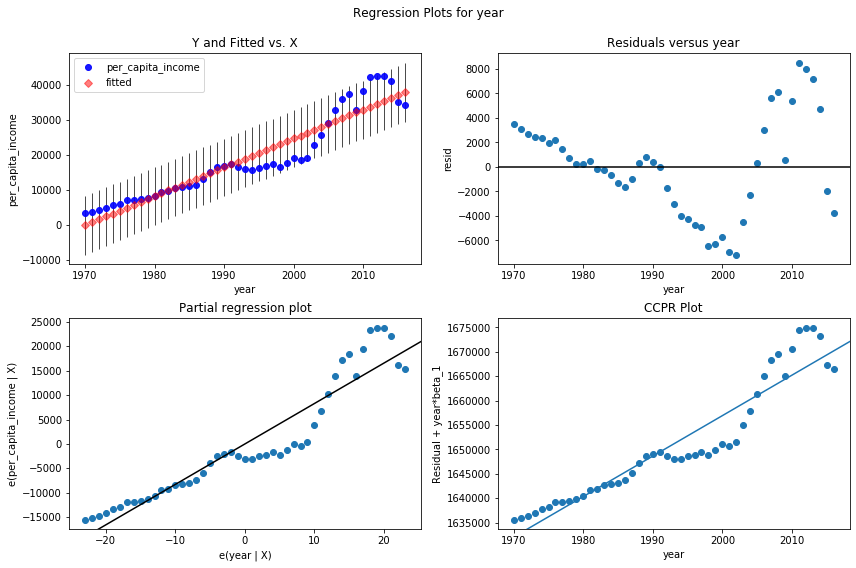

In [130]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'year', fig=fig)

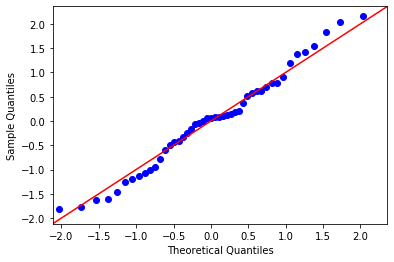

In [131]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

In [132]:
# Using Sklearn
reg = LinearRegression()
reg.fit(df[['year']],df.per_capita_income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
# Predict income for ny year
# Can do print(reg.predict([[x]]))
reg.predict([[2099]])

array([106737.43503701])

### Multiple Variable Linear Regression

In [134]:
# New dataset - Multi variables
df2 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


##### Manipulation - Experience, Test Score, Interview Score & Salary

In [135]:
# Filling in the null values - to use the values in the LR, we need to convert the words to numbers
df2.experience = df2.experience.fillna("zero")
df2.experience = df2.experience.apply(w2n.word_to_num)

In [136]:
# Since the "Test Score (Out of 10)" are floats, we need to find the mean to find the interger mean.
mean_test_score = math.floor(df2['test_score(out of 10)'].mean())
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(mean_test_score)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


##### Multi Variable Linear Regression

In [137]:
#Creating the model
reg2 = LinearRegression()

#Use this format for multiple variables - reg.fit(df[['col1', 'col2', 'col3']], df['response variable'])
    # Since the response variable column in this example will have invalid syntax - we need to put it in it's own s.brackets.
reg2.fit(df2[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']],df2['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
# Use - modelname.predict([[1,2,3]]) - to use the model to predict
    # The explanatory values should be in the order of how the model was fitted
reg2.predict([[3, 8, 9]])

array([60857.27438577])

In [139]:
# Multi variable prediction
    # modelname.predict([[x,x..], [x,x...]]) 
        # As long as the brackets open like ([[]]), then you can include as many variables as you want
        
reg2.predict([[4,7,9], [1,9,9], [6, 8, 9]])

array([61558.23430121, 57234.04545532, 69624.08143084])

### Gradient Descent & Cost Function

Formulas:

- **mse or cf = (1/n) * sum([val ** 2 for val in (y - y_predicted])])** - Mean Squared Error / Cost Function
- **mse or cf = (1/n) * sum((y - y_predicted)**2)** - Mean Sqaured Error / Cost Function


- **partial derivative of *m* = -(2/n) * sum(x*(y - y_predicted))** - Partial Derivative (m) 
- **partial derivative of *b* = -(2/n) * sum(y - y_predicted)** - Partial Derivative (b)


- **m = m - learning_rate * m_pderivative** - Position of m (y = **m** * x + b), learning_rate and m_pderivative are variables - make sure to name them 
- **b = b - learning_rate * b_pderivative** - Position of b (y = m * x + **b**), learning_rate and m_pderivative are variables - make sure to name them 

##### Script for GD & CF - Order Is Important

In [140]:
def gradient_descent(x,y): # Create a function to make gradient descent with x&y 
    m_gd = b_gd = 0 # future reference for; m*x = b // gd = gradient descent 
    iterations = 50 # This is a variable and can be changed - Random value to find global minima - how many steps are taken
    n = len(x) # This will be used for finding the derivative
    learning_rate = 0.5 #This is a variable for the learning rate - steps taken in the gradient descent
    
    for i in range(iterations): # For loop for how many steps are taken and takes into account the following:
                                # Cost - if it's reducing, 
        y_predicted = m_gd * x + b_gd # y = m*x +b
        cost = (1/n) * sum([val ** 2 for val in (y - y_predicted)]) # Finds cost - if you're reducing the cost the GD is working
        m_d = -(2/n) * sum(x*(y - y_predicted)) # Caculating patrial derivative of m - Partial derivative because for GD the "steps" are smaller
        b_d = -(2/n) * sum(y-y_predicted) # Calculating partial derivative of b - Partial derivative because for GD the "steps" are smaller
        m_gd = m_gd - learning_rate * m_d 
        b_gd = b_gd - learning_rate * m_d
        print("m {}, b {}, cost {}, interations {}".format(m_gd,b_gd, cost, i)) # Print each value increment at each iteration,
                                                                         # Format it route to from the interations and m/b values
                                                                         # "i" is important as it counts each increment of the iterations - otherwise you'd get a constant xx... number

# Assign X and Y values - array makes it easier to multiply in the future.
x = np.array(df['year'])
y = np.array(df['per_capita_income'])

gradient_descent(x,y)

m 37860270.74120566, b 37860270.74120566, cost 499723531.6384421, interations 0
m -150465196626197.4, b -150465196626197.4, cost 5.699511279765023e+21, interations 1
m 5.979825460617873e+20, b 5.979825460617873e+20, cost 9.00207277241412e+34, interations 2
m -2.3765171841224065e+27, b -2.3765171841224065e+27, cost 1.421829174856268e+48, interations 3
m 9.444814006068872e+33, b 9.444814006068872e+33, cost 2.2457030214945884e+61, interations 4
m -3.753581594326906e+40, b -3.753581594326906e+40, cost 3.5469676315087134e+74, interations 5
m 1.4917577811713847e+47, b 1.4917577811713847e+47, cost 5.602245380868516e+87, interations 6
m -5.9285810678758455e+53, b -5.9285810678758455e+53, cost 8.84844649515813e+100, interations 7
m 2.356151509447889e+60, b 2.356151509447889e+60, cost 1.397564727261878e+114, interations 8
m -9.363876232635536e+66, b -9.363876232635536e+66, cost 2.2073786262428692e+127, interations 9
m 3.721415102064597e+73, b 3.721415102064597e+73, cost 3.486436302052459e+140, i

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


### Saving A Model

In [141]:
# Library for saving a model
from sklearn.externals import joblib

In [142]:
joblib.dump(reg, 'regression_practice')

['regression_practice']

In [143]:
prac = joblib.load('regression_practice')

In [144]:
prac.predict([[2070]])

array([82711.94785555])